In [1]:
# Import necessary packages

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read weights

weights = pl.read_parquet('../all_weights_pivot.parquet')
data = pl.read_parquet('../russell_3000_daily.parquet')

In [3]:
data

date,barrid,ticker,price,return,specific_return,specific_risk,historical_beta,predicted_beta,market_cap,daily_volume,bid_ask_spread
date,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
2013-07-31,"""USA06Z1""","""MDXG""",6.26,-0.1595,-0.788,55.056916,0.328385,0.34349,6.006157e8,121693.0,0.01
2013-08-01,"""USA06Z1""","""MDXG""",6.32,0.9585,0.365,55.028021,0.334989,0.353329,6.0865392e8,131728.0,0.01
2013-08-02,"""USA06Z1""","""MDXG""",6.31,-0.1582,-0.731,54.807402,0.330713,0.363624,6.0769086e8,43252.0,0.01
2013-08-05,"""USA06Z1""","""MDXG""",6.45,2.2187,1.936,54.76671,0.324494,0.356596,6.211737e8,70944.0,0.02
2013-08-06,"""USA06Z1""","""MDXG""",6.29,-2.4806,-0.528,54.692162,0.366323,0.399196,6.0576474e8,77085.0,0.01
…,…,…,…,…,…,…,…,…,…,…,…
2025-09-09,"""USBRKA2""","""GLIBA""",36.225,-0.4261,1.121,20.842679,0.236481,0.302514,1.3226e8,31025.0,0.11
2025-09-10,"""USBRKA2""","""GLIBA""",36.24,0.0414,2.305,20.954701,0.252015,0.29845,1.3231e8,6298.0,0.21
2025-09-11,"""USBRKA2""","""GLIBA""",37.05,2.2351,0.213,21.480703,0.256752,0.31384,1.3527e8,26857.0,0.25


In [4]:
weights

date,barrid,bab_weight,meanrev_weight,momentum_weight
date,str,f64,f64,f64
1995-06-30,"""USAA191""",-1.0844e-20,null,null
1995-06-30,"""USAA1W1""",-9.1201e-22,null,null
1995-06-30,"""USAA1Y1""",-4.8273e-21,null,null
1995-06-30,"""USAA2L1""",-4.2673e-21,null,null
1995-06-30,"""USAA311""",-9.2198e-21,null,null
…,…,…,…,…
2025-09-15,"""USBQZR1""",-6.9890e-22,-6.1406e-20,null
2025-09-15,"""USBRGT1""",-3.7165e-21,-6.0722e-19,null
2025-09-15,"""USBRH21""",-2.6956e-21,-2.1598e-19,null


In [5]:
weights_bab = (
    weights
    .select(["date", "barrid", "bab_weight"])
    .rename({"bab_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("bab").alias("signal"))
)

weights_meanrev = (
    weights
    .select(["date", "barrid", "meanrev_weight"])
    .rename({"meanrev_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("meanrev").alias("signal"))
)

weights_momentum = (
    weights
    .select(["date", "barrid", "momentum_weight"])
    .rename({"momentum_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("momentum").alias("signal"))
)

In [9]:
def task_compute_returns(weights: pl.DataFrame, data: pl.DataFrame) -> pl.DataFrame:
    """ 
    Compute the optimal portfolio returns.

    Args:
        weights (pl.DataFrame): Data frame containing barrid, date, and weight columns.
        data (pl.DataFrame): Data frame containing barrid, date, and return columns

    Returns:
        pl.DataFrame: Data frame containing date, fwd_return, and cumulative_fwd_return_columns
    """
    return (                 
        weights
        .join(data, on=['date', 'barrid'], how='left')
        .select('date', 'barrid', 'weight', 'return')
        .with_columns(
            pl.col('return').truediv(100)
        )
        .sort('barrid', 'date')
        .with_columns(
            pl.col('return').shift(-1).over('barrid').alias('fwd_return')
        )
        .drop_nulls('fwd_return')
        .group_by('date')
        .agg(
            pl.col('fwd_return').mul('weight').sum()
        )
        .sort('date')
        .with_columns(
            pl.col('fwd_return').add(1).cum_prod().sub(1).alias('cumulative_fwd_return')
        )
        .with_columns(
            pl.col('fwd_return', 'cumulative_fwd_return').mul(100)
        )
    )               

In [10]:
returns_bab = task_compute_returns(weights_bab, data)

returns_bab

date,fwd_return,cumulative_fwd_return
date,f64,f64
1995-06-30,0.339623,0.339623
1995-07-03,0.684813,1.026762
1995-07-05,1.576081,2.619026
1995-07-06,1.363159,4.017886
1995-07-07,0.716328,4.762996
…,…,…
2025-09-08,0.804319,3874.937532
2025-09-09,-0.161181,3868.530675
2025-09-10,1.411964,3924.564917


In [11]:
returns_meanrev = task_compute_returns(weights_meanrev, data)

returns_meanrev

date,fwd_return,cumulative_fwd_return
date,f64,f64
1995-08-02,-2.080259,-2.080259
1995-08-03,-1.923892,-3.96413
1995-08-04,4.443093,0.302834
1995-08-07,-2.399445,-2.103877
1995-08-08,1.449727,-0.684651
…,…,…
2025-09-08,0.373996,1.5207e12
2025-09-09,-0.102559,1.5192e12
2025-09-10,1.568695,1.5430e12


In [12]:
returns_momentum = task_compute_returns(weights_momentum, data)

returns_momentum

date,fwd_return,cumulative_fwd_return
date,f64,f64
1996-06-27,1.946266,1.946266
1996-06-28,-0.199177,1.743212
1996-07-01,0.34481,2.094033
1996-07-02,-0.555719,1.526678
1996-07-03,-1.004611,0.50673
…,…,…
2025-09-08,1.882738,8918.865102
2025-09-09,-1.380559,8794.35431
2025-09-10,2.117512,8982.693363


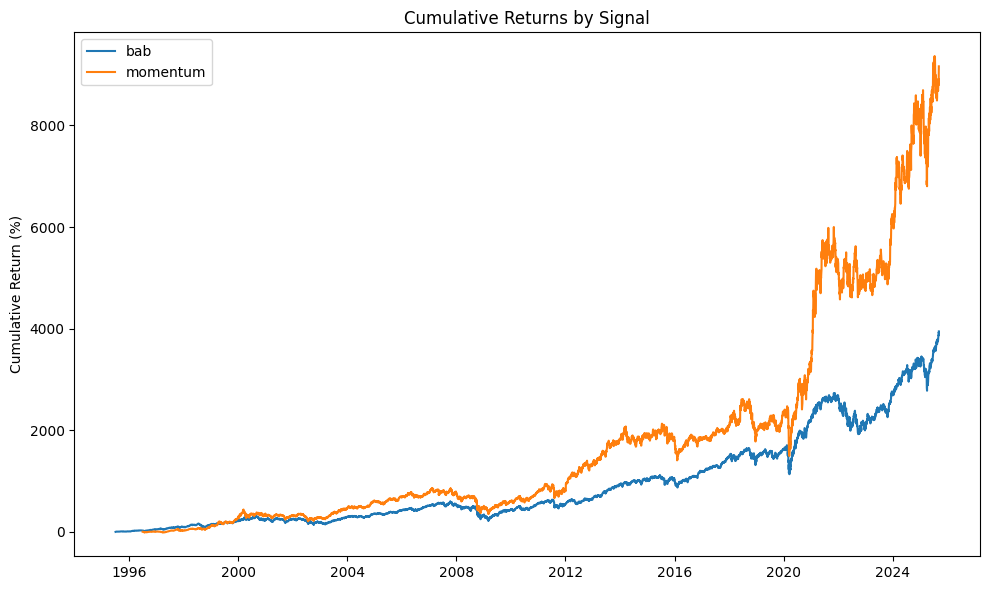

In [17]:
plt.figure(figsize=(10, 6))

# Plot each signal separately
plt.plot(returns_bab["date"], returns_bab["cumulative_fwd_return"], label="bab")
# plt.plot(returns_meanrev["date"], returns_meanrev["cumulative_fwd_return"], label="meanrev")
plt.plot(returns_momentum["date"], returns_momentum["cumulative_fwd_return"], label="momentum")

# Labels & legend
plt.xlabel(None)
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns by Signal")
plt.legend()
plt.tight_layout()
plt.show()